In [2]:
import pandas as pd
import numpy as np
from datetime import *
#pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/tor_wikipedia_edits_20180522.tsv", sep="\t")
len(df)

14225

In [4]:
df2 = df.copy()
df2['numberofedits'] = df2.groupby('editor')['editor'].transform(pd.Series.value_counts)
df2 = df2.sort_values('numberofedits', ascending=False)
df2.head()
#result = df2.drop_duplicates(subset='editor', keep='last')
#result.head()

,revid,editor,datetime,reverting,reverted,numberofedits
6933,390265665,77.69.195.30,2010-10-12 12:01:23,False,True,363
962,411657479,77.69.195.30,2011-02-02 21:44:00,False,False,363
9900,387149184,77.69.195.30,2010-09-26 16:39:46,True,True,363
9901,387760683,77.69.195.30,2010-09-29 17:34:44,False,True,363
9921,375708334,77.69.195.30,2010-07-27 10:24:15,False,False,363


In [5]:
df['monthyear'] = df['datetime'].str.slice(0,7)
edits_by_month = []
for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']:
    for x in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        month_year = y+ '-'+ x
        edits = len(df[df['monthyear'] == month_year])
        edits_by_month.append(edits)
print(edits_by_month)
#edits_2010

[0, 4, 40, 190, 338, 245, 518, 375, 372, 540, 317, 382, 420, 611, 511, 552, 595, 629, 605, 766, 646, 325, 823, 638, 312, 154, 45, 64, 95, 77, 72, 89, 35, 61, 131, 235, 189, 185, 222, 111, 57, 44, 54, 53, 37, 47, 54, 46, 48, 54, 69, 48, 35, 51, 29, 45, 54, 40, 40, 26, 30, 32, 13, 11, 24, 27, 27, 36, 10, 69, 47, 44, 39, 18, 27, 7, 32, 14, 10, 6, 5, 40, 28, 38, 33, 4, 14, 1, 12, 17, 8, 12, 1, 21, 11, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
anon_edits = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/enwiki-anon-edits.tsv", delimiter="\t", quotechar='"', header = None, names = ['revid', 'editor', 'datetime', 'reverted'])
anon_edits['monthyear'] = anon_edits['datetime'].str.slice(0,7)
anon_edits.head()

,revid,editor,datetime,reverted,monthyear
0,20979541,203.123.69.213,2005-08-14 08:00:48,False,2005-08
1,26710183,80.242.32.51,2005-10-28 14:58:46,False,2005-10
2,45670680,216.167.142.173,2006-03-27 06:23:12,False,2006-03
3,70780318,70.108.123.98,2006-08-20 16:11:27,False,2006-08
4,74068720,72.59.255.213,2006-09-06 03:39:15,False,2006-09


In [6]:
#number of Tor edits by month
#edits_by_month = [0, 4, 40, 190, 338, 245, 518, 375, 372, 540, 317, 382, 420, 611, 511, 552, 595, 629, 605, 766, 646, 325, 823, 638, 312, 154, 45, 64, 95, 77, 72, 89, 35, 61, 131, 235, 189, 185, 222, 111, 57, 44, 54, 53, 37, 47, 54, 46, 48, 54, 69, 48, 35, 51, 29, 45, 54, 40, 40, 26, 30, 32, 13, 11, 24, 27, 27, 36, 10, 69, 47, 44, 39, 18, 27, 7, 32, 14, 10, 6, 5, 40, 28, 38, 33, 4, 14, 1, 12, 17, 8, 12, 1, 21, 11, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#initiate an empty DataFrame
random_samples = pd.DataFrame()
#find all edits within given months then randomly select samples
r = 0
for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']:
    for x in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        s = y + '-' + x
        if int(edits_by_month[r]) > 0:
            edits = anon_edits[anon_edits['monthyear'] == s]
            #concatinate the selected samples to the result DF
            random_samples = pd.concat([random_samples, edits.sample(n=int(edits_by_month[r]))])
        r +=1
random_samples.drop(['monthyear'], axis=1, inplace=True)
random_samples = random_samples.set_index('revid')
random_samples.to_csv("/Users/nevermoar/Documents/tor_wiki/random_samples_anon.tsv", sep="\t")


In [7]:
registeredEdits = pd.DataFrame()
r_edits = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/registered_edits_nonbot.tsv", delimiter="\t", quotechar='"', header = None, names = ['revid', 'editor', 'datetime', 'reverted'], low_memory=False)
r_edits['monthyear'] = r_edits['datetime'].str.slice(0,7)
#find all edits within given months then randomly select samples
r = 0
for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']:
    for x in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        s = y + '-' + x
        if int(edits_by_month[r]) > 0:
            edits = r_edits[r_edits['monthyear'] == s]
            #concatinate the selected samples to the result DF
            registeredEdits = pd.concat([registeredEdits, edits.sample(n=int(edits_by_month[r]))])
        r +=1
registeredEdits.drop(['monthyear'], axis=1, inplace=True)
registeredEdits = registeredEdits.set_index('revid')
registeredEdits.to_csv("/Users/nevermoar/Documents/tor_wiki/random_samples_registered_nonbot2.tsv", sep="\t")


In [3]:
reverting_re = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/random_samples_anon-reverted.tsv", delimiter="\t", quotechar='"', header = None, names = ['revid', 'editor', 'datetime', 'reverted'])
reverting_re = len(reverting_re[reverting_re['reverted'] == 'TRUE'])
reverting_re/14225

0.0

In [5]:
reverting_re = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/random_samples_registered_nb.tsv", delimiter="\t", quotechar='"', header = None, names = ['revid', 'editor', 'datetime', 'reverted'])
reverting_re = len(reverting_re[reverting_re['reverted'] == 'True'])
reverting_re/14225

0.053778558875219686

In [10]:
edits_2016 = len(df[df['year'] == '2016'])
edits_2016

264

In [11]:
edits_2017 = len(df[df['year'] == '2017'])
edits_2017

136

In [12]:
edits_2018 = df[df['year'] == '2018']
edits_2018

,revid,editor,datetime,reverting,reverted,year
5174,819560679,23.238.162.11,2018-01-10 01:34:56,False,True,2018
5175,819561734,23.238.162.11,2018-01-10 01:43:59,False,True,2018
5703,818460489,95.165.133.22,2018-01-03 18:12:56,False,True,2018
5704,818460568,95.165.133.22,2018-01-03 18:13:31,False,True,2018
5705,818460663,95.165.133.22,2018-01-03 18:14:21,False,True,2018


In [13]:
ips_2010 = df[df['year'] == '2010']
len(ips_2010.drop_duplicates(subset='editor', keep='last'))


825

In [14]:
ips_2011 = df[df['year'] == '2011']
len(ips_2011.drop_duplicates(subset='editor', keep='last'))



694

In [15]:
ips_2012 = df[df['year'] == '2012']
len(ips_2012.drop_duplicates(subset='editor', keep='last'))

505

In [16]:
ips_2013 = df[df['year'] == '2013']
len(ips_2013.drop_duplicates(subset='editor', keep='last'))

480

In [17]:
ips_2014 = df[df['year'] == '2014']
len(ips_2014.drop_duplicates(subset='editor', keep='last'))

247

In [18]:
ips_2015 = df[df['year'] == '2015']
len(ips_2015.drop_duplicates(subset='editor', keep='last'))

106

In [19]:
ips_2016 = df[df['year'] == '2016']
len(ips_2016.drop_duplicates(subset='editor', keep='last'))

70

In [20]:
ips_2017 = df[df['year'] == '2017']
len(ips_2017.drop_duplicates(subset='editor', keep='last'))

37

In [21]:
ips_2018 = df[df['year'] == '2018']
len(ips_2018.drop_duplicates(subset='editor', keep='last'))

2

In [22]:
reverting = len(df[df['reverting'] == True])
(reverting/len(df))*100


8.224956063268893

In [23]:
reverted = len(df[df['reverted'] == True])
(reverted/len(df))*100


31.641476274165203

In [24]:
reverted_2010 = df[df['year'] == '2010']
reverted_2010_rate = len(reverted_2010[reverted_2010['reverted'] == True])
reverted_2010_rate/len(reverted_2010)

0.35862691960252935

In [25]:
reverted_2011 = df[df['year'] == '2011']
reverted_2011_rate = len(reverted_2011[reverted_2011['reverted'] == True])
reverted_2011_rate/len(reverted_2011)

0.2562842297430136

In [26]:
reverted_2012 = df[df['year'] == '2012']
reverted_2012_rate = len(reverted_2012[reverted_2012['reverted'] == True])
reverted_2012_rate/len(reverted_2012)

0.4364963503649635

In [27]:
reverted_2013 = df[df['year'] == '2013']
reverted_2013_rate = len(reverted_2013[reverted_2013['reverted'] == True])
reverted_2013_rate/len(reverted_2013)

0.462238398544131

In [28]:
reverted_2014 = df[df['year'] == '2014']
reverted_2014_rate = len(reverted_2014[reverted_2014['reverted'] == True])
reverted_2014_rate/len(reverted_2014)

0.274582560296846

In [29]:
reverted_2015 = df[df['year'] == '2015']
reverted_2015_rate = len(reverted_2015[reverted_2015['reverted'] == True])
reverted_2015_rate/len(reverted_2015)

0.21891891891891893

In [30]:
reverted_2016 = df[df['year'] == '2016']
reverted_2016_rate = len(reverted_2016[reverted_2016['reverted'] == True])
reverted_2016_rate/len(reverted_2016)


0.36363636363636365

In [31]:
reverted_2017 = df[df['year'] == '2017']
reverted_2017_rate = len(reverted_2017[reverted_2017['reverted'] == True])
reverted_2017_rate/len(reverted_2017)

0.3602941176470588

In [32]:
ips_mt10_edits = df2[df2['numberofedits'] ==115]
ips_mt10_edits
#ips_mt10_edits =ips_mt10_edits.drop_duplicates(subset='editor', keep='last')
ips_mt10_edits_rate = len(ips_mt10_edits[ips_mt10_edits['reverted'] == True])
ips_mt10_edits_rate/len(ips_mt10_edits)


0.19130434782608696

In [33]:
ips_lt10_edits = df2[(df2['numberofedits'] <10)]
#ips_mt10_edits =ips_mt10_edits.drop_duplicates(subset='editor', keep='last')
ips_lt10_edits_rate = len(ips_lt10_edits[ips_lt10_edits['reverted'] == True])
ips_lt10_edits_rate/len(ips_lt10_edits)

0.4106334841628959

In [34]:
#find the revert rate of of all different number of edits
edits = df2.numberofedits.unique()
all_revert_rates = {}
for e in edits:
    num_of_reverts = df2[df2['numberofedits'] == e]
    edit_rates = len(num_of_reverts[num_of_reverts['reverted'] == True])
    edit_rates = edit_rates/len(num_of_reverts)
    all_revert_rates[e] = edit_rates
df = pd.DataFrame.from_dict(all_revert_rates, orient='index')
df = df.sort_index()
df = df.reset_index()
df.columns = ['num_of_edits', 'revert_rate']



In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


[Text(0,0.5,'y label'), Text(0.5,0,'x label')]

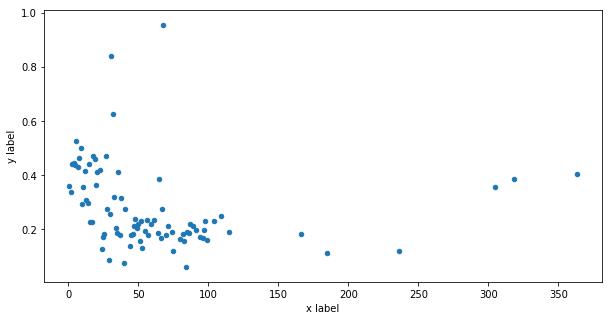

In [36]:
ax = df.plot.scatter(x = 'num_of_edits', y = 'revert_rate')
ax.set(xlabel ='x label', ylabel = 'y label')

In [37]:
df2['year'] = df2['datetime'].str.slice(0,7)
df2

,revid,editor,datetime,reverting,reverted,numberofedits,year
6933,390265665,77.69.195.30,2010-10-12 12:01:23,False,True,363,2010
962,411657479,77.69.195.30,2011-02-02 21:44:00,False,False,363,2011
9900,387149184,77.69.195.30,2010-09-26 16:39:46,True,True,363,2010
9901,387760683,77.69.195.30,2010-09-29 17:34:44,False,True,363,2010
9921,375708334,77.69.195.30,2010-07-27 10:24:15,False,False,363,2010
9933,371034264,77.69.195.30,2010-06-30 16:17:22,False,True,363,2010
9934,371034529,77.69.195.30,2010-06-30 16:19:16,False,True,363,2010
10015,365595001,77.69.195.30,2010-06-02 07:42:22,False,True,363,2010
10098,383244301,77.69.195.30,2010-09-06 13:21:04,False,False,363,2010
10147,416005956,77.69.195.30,2011-02-26 08:30:46,False,False,363,2011


In [44]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
edits_by_year = []
reverted_rates = []
distinct_ips=[]
for y in years:
    #list of edits by year
    edy = df2[df2['year'] == y]
    ips_by_year = len(edy.drop_duplicates(subset='editor', keep='last'))
    distinct_ips.append(ips_by_year)
    num_edits = len(edy)
    edits_by_year.append(num_edits)
    reverteds_by_year = len(edy[edy['reverted'] == True])
    reverted_rate_by_year = (reverteds_by_year/num_edits)*100
    reverted_rates.append(reverted_rate_by_year)
    
table = {'Number_of_edits': edits_by_year, 'Number_of_IPs': distinct_ips, 'Reverted_rates': reverted_rates}
df3 = pd.DataFrame(data=table, index = years)
df3

ZeroDivisionError: division by zero

Text(0,0.5,'Number of edits')

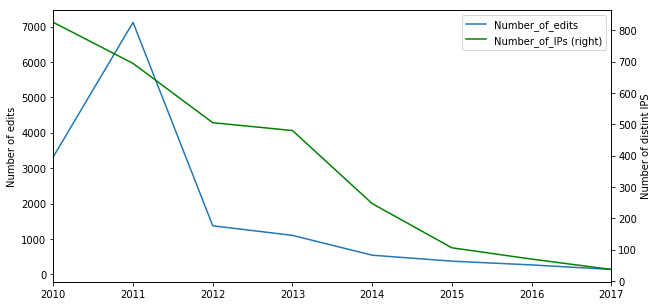

In [39]:
df3['Number_of_edits'].plot(legend = True)
ax = df3['Number_of_IPs'].plot(secondary_y=True, style='g', legend = True)
ax.set_ylabel('Number of distint IPS')
ax.left_ax.set_ylabel('Number of edits')



Text(0,0.5,'Revert Rates')

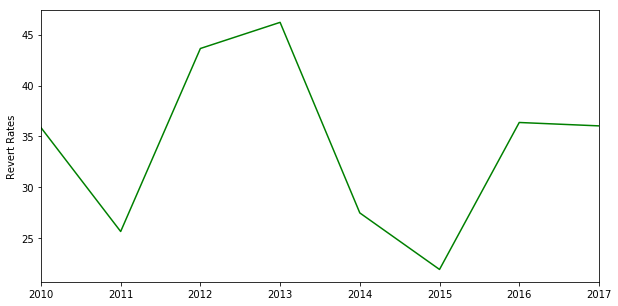

In [40]:
ax2 = df3['Reverted_rates'].plot(style='g')
ax2.set_ylabel('Revert Rates')

In [41]:
df4 = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/block_ips_20180520.tsv", sep="\t", names = 
['ip_address', 'publish_d', 'action', 'block_date', 'comment'])
df5 = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/block_ips_all_20180520_backup.tsv", sep="\t", names = 
['ip_address', 'publish_d', 'action', 'block_date', 'comment'])
df4['year'] = df4['block_date'].str.slice(0,4)
df5['year'] = df5['block_date'].str.slice(0,4)
df4

,ip_address,publish_d,action,block_date,comment,year
0,18.187.1.68,2011-11-18 01:22:55,block,2006-01-16 21:12:39,NPA,2006
1,18.187.1.68,2011-11-18 01:22:55,unblock,2006-01-16 21:36:33,"open proxy, extending block",2006
2,18.187.1.68,2011-11-18 01:22:55,block,2006-01-16 21:38:12,Open proxy,2006
3,216.194.67.53,2010-10-21 12:02:11,block,2006-02-16 21:05:32,Tor {{openproxy}},2006
4,80.58.205.39,2010-10-24 16:54:34,block,2006-05-18 08:33:53,repeated vandalism to various articles,2006
5,80.58.205.39,2010-10-24 16:54:34,block,2006-06-01 04:57:53,Blocked user evading block,2006
6,80.58.205.39,2010-10-24 16:54:34,block,2006-06-03 19:39:47,sockpuppet; see [[Wikipedia:Suspected_sock_pup...,2006
7,80.58.205.39,2010-10-24 16:54:34,block,2006-06-03 19:39:50,sockpuppet; see [[Wikipedia:Suspected_sock_pup...,2006
8,166.70.207.2,2011-12-02 23:58:27,block,2006-06-13 21:24:39,persistent ban evasion.,2006
9,129.194.8.73,2011-11-20 05:26:08,block,2006-07-04 14:06:37,spam,2006


In [42]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
#df2['year'] = df2['datetime'].str.slice(0,4)
blocks_by_year = []
blocks_all_by_year =[]

for y in years:
    #list of edits by year
    by = df4[df4['year'] == y]
    bya = df5[df5['year'] == y]
    blocks_by_year.append(len(by))
    blocks_all_by_year.append(len(bya))
table2 = {'Blocks_w_1_edits': blocks_by_year, 'Blocks_w_0_edits': blocks_all_by_year}
df6 = pd.DataFrame(data=table2, index = years)
df6
    

,Blocks_w_0_edits,Blocks_w_1_edits
2010,1531,437
2011,15243,1451
2012,9154,1282
2013,2415,303
2014,289,34
2015,353,23
2016,557,32
2017,839,40


Text(0,0.5,'Blocks of all Tor IPs')

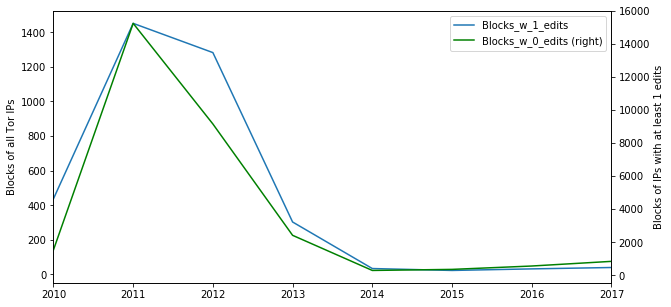

In [43]:
df6['Blocks_w_1_edits'].plot(legend = True)
ax2 = df6['Blocks_w_0_edits'].plot(secondary_y=True, style='g', legend = True)
ax2.set_ylabel('Blocks of IPs with at least 1 edits')
ax2.left_ax.set_ylabel('Blocks of all Tor IPs')


In [44]:
#import the Tor Exit Node list
df6 = pd.read_csv("/Users/nevermoar/Documents/tor_wiki/tor_exit_list_20170128.csv",skiprows =1, names = ['ip_address', 'publish_date', 'last_status', 'days_active', "exit_address", "number_of_nodes", "file_name"])
df6 = df6.drop(['number_of_nodes', 'file_name', 'exit_address'], axis = 1)
df6.head()

,ip_address,publish_date,last_status,days_active
0,220.253.29.170,2011-07-11 21:10:02,2011-07-12 01:03:12,2
1,95.113.88.122,2014-01-23 04:05:20,2014-01-24 05:03:26,2
2,213.39.143.87,2010-04-29 14:48:07,2010-04-29 15:09:55,1
3,68.144.78.76,2011-06-13 09:22:20,2011-07-18 07:03:34,36
4,92.47.217.138,2012-10-18 06:37:28,2012-10-18 10:02:51,1


In [45]:
years = ['01-2015', '2016', '2017']
#check all edits from 2015 to 2017
edy = df2[df2['year'].isin(years)]
edy.head()

,revid,editor,datetime,reverting,reverted,numberofedits,year
12810,666242369,193.138.219.228,2015-06-09 21:02:17,False,False,65,2015
12112,674139459,193.138.219.228,2015-08-01 22:44:27,True,False,65,2015
12114,674139664,193.138.219.228,2015-08-01 22:46:39,True,False,65,2015
12113,674139640,193.138.219.228,2015-08-01 22:46:21,False,True,65,2015
9737,688707624,193.138.219.228,2015-11-02 16:00:18,False,False,65,2015


In [46]:
#remove all duplicated rows
edy =edy.drop_duplicates(subset='editor', keep='last')
edy.head()
    

,revid,editor,datetime,reverting,reverted,numberofedits,year
12117,674139947,193.138.219.228,2015-08-01 22:49:47,False,True,65,2015
10327,749895589,51.15.37.97,2016-11-16 18:42:40,False,False,53,2016
10809,686671311,91.219.237.229,2015-10-20 15:49:29,False,False,40,2015
9833,806996229,83.220.174.128,2017-10-25 08:51:01,False,True,33,2017
641,689435560,46.21.99.26,2015-11-07 04:12:09,True,False,28,2015


In [47]:
editors = edy['editor']
#find Tor IP address that makes edits from 2015 to 2017 
rows = []
result = df6[df6['ip_address'].isin(editors)]
result

,ip_address,publish_date,last_status,days_active
3117,82.145.52.132,2015-04-26 20:27:01,2015-05-19 09:03:12,29
14565,120.59.173.230,2013-11-04 15:23:23,2017-01-13 04:02:58,3
16293,120.56.171.8,2012-11-30 11:07:16,2016-09-04 08:03:24,3
18416,89.12.193.122,2017-08-15 19:52:37,2017-08-16 02:02:39,2
20462,59.177.78.176,2012-01-16 11:54:08,2015-10-15 22:03:05,3
22635,120.59.166.173,2015-08-04 22:06:25,2016-03-25 05:03:00,4
23158,59.177.74.60,2010-05-31 08:11:43,2016-04-14 12:03:05,3
27315,80.248.208.131,2012-06-10 14:50:48,2017-11-08 16:02:54,1708
31225,185.11.180.67,2016-03-11 21:26:09,2017-05-26 22:03:39,412
31526,120.59.45.229,2015-03-11 20:28:30,2015-06-03 23:03:06,2


In [48]:
#join table of Wikiedits with the table of Tor Exit Nodes by the IP
table2 = edy.set_index('editor').join(result.set_index('ip_address'))
#sort values by the revision publish date
table2 = table2.sort_values(by=['datetime'])
table2 = table2.drop(['year'], axis = 1)
table2.to_csv('new_table.tsv', sep ="\t")
table2


,revid,datetime,reverting,reverted,numberofedits,publish_date,last_status,days_active
editor,,,,,,,,
120.59.32.35,640518640,2015-01-01 15:37:33,False,True,1,2013-10-28 08:06:13,2015-06-03 12:03:15,2
120.56.161.136,640528481,2015-01-01 16:57:17,False,False,2,2011-11-27 04:23:18,2015-11-17 02:03:37,6
46.21.151.107,641201718,2015-01-06 06:48:15,False,False,9,2014-09-22 14:15:19,2015-02-28 15:03:01,21
199.247.233.59,641493294,2015-01-07 23:12:52,False,True,5,2014-12-23 22:41:15,2016-01-01 15:03:05,19
77.234.44.181,641495497,2015-01-07 23:33:03,False,True,1,2014-12-28 20:11:25,2015-01-31 18:02:28,3
120.56.172.102,641594002,2015-01-08 16:21:30,False,False,1,2011-02-15 16:11:48,2015-12-04 09:02:59,8
77.234.44.139,641801646,2015-01-10 00:00:13,True,False,1,2015-01-03 16:01:43,2015-02-20 01:03:22,2
46.21.154.83,642016133,2015-01-11 14:44:03,False,False,2,2013-11-28 05:41:20,2017-06-08 01:02:59,11
59.177.76.66,642181757,2015-01-12 17:40:48,False,False,8,2013-05-16 09:40:57,2015-06-11 05:02:44,4


In [49]:
#find all block events of IPs that made edit(s) from 2015 to 2017
q = df4[df4['ip_address'].isin(editors)]
table3 = q.set_index('ip_address').join(result.set_index('ip_address'))
table3 = table3.drop(['year'], axis = 1)
#table3 = table3.drop_duplicates(subset='block_date', keep='last')
table3

,publish_d,action,block_date,comment,publish_date,last_status,days_active
ip_address,,,,,,,
103.41.177.49,2017-01-23 23:21:08,block,2017-01-24 00:13:08,[[WP:Blocking policy#Evasion of blocks|Block e...,2016-01-26 15:02:21,2017-06-07 01:02:58,424
109.201.133.100,2017-12-19 13:29:41,block,2016-07-26 08:15:38,{{blocked proxy}} <!-- 195.14.219.97:3128 -->,2015-12-10 13:32:55,2018-01-26 23:01:42,827
109.201.133.100,2017-12-19 13:29:41,block,2016-11-13 22:12:51,{{blocked proxy}} <!-- 188.166.175.107:8118 -->,2015-12-10 13:32:55,2018-01-26 23:01:42,827
109.201.133.100,2017-12-19 13:29:41,block,2017-03-25 03:12:25,{{blocked proxy}} <!-- 138.68.167.221:8118 -->,2015-12-10 13:32:55,2018-01-26 23:01:42,827
109.201.133.100,2017-12-19 13:29:41,block,2017-10-10 17:20:13,{{blocked proxy}} <!-- 46.101.91.102:8118 -->,2015-12-10 13:32:55,2018-01-26 23:01:42,827
109.201.133.100,2017-12-19 13:29:41,block,2018-01-04 19:13:16,{{blocked proxy}} <!-- 159.89.180.67:8118 -->,2015-12-10 13:32:55,2018-01-26 23:01:42,827
110.174.43.136,2017-10-17 15:57:20,block,2011-05-31 14:37:28,{{tor}} <!-- Routing port 444 on this node not...,2010-02-24 11:47:45,2017-12-30 02:02:53,2484
110.174.43.136,2017-10-17 15:57:20,block,2011-06-22 18:48:01,{{tor}} <!-- Routing port 444 on this node not...,2010-02-24 11:47:45,2017-12-30 02:02:53,2484
110.174.43.136,2017-10-17 15:57:20,block,2011-07-08 15:38:06,{{tor}} <!-- Routing port 444 on this node not...,2010-02-24 11:47:45,2017-12-30 02:02:53,2484


In [50]:
df2

,revid,editor,datetime,reverting,reverted,numberofedits,year
6933,390265665,77.69.195.30,2010-10-12 12:01:23,False,True,363,2010
962,411657479,77.69.195.30,2011-02-02 21:44:00,False,False,363,2011
9900,387149184,77.69.195.30,2010-09-26 16:39:46,True,True,363,2010
9901,387760683,77.69.195.30,2010-09-29 17:34:44,False,True,363,2010
9921,375708334,77.69.195.30,2010-07-27 10:24:15,False,False,363,2010
9933,371034264,77.69.195.30,2010-06-30 16:17:22,False,True,363,2010
9934,371034529,77.69.195.30,2010-06-30 16:19:16,False,True,363,2010
10015,365595001,77.69.195.30,2010-06-02 07:42:22,False,True,363,2010
10098,383244301,77.69.195.30,2010-09-06 13:21:04,False,False,363,2010
10147,416005956,77.69.195.30,2011-02-26 08:30:46,False,False,363,2011


In [74]:
#find list of IP addresses
rev =df2.drop_duplicates(subset='editor', keep='last')
rev = rev['editor']
for r in rev:
    #counting number of sessions for each IP
    sessions = 0
    session_time = timedelta(hours = 0)
    ips = df2[df2['editor'] == r]
    #sort by datetime
    ips = ips.sort_values(by=['datetime'])
    ips =ips.reset_index(drop=True)
    #print(ips)
    row = 0
    while row < len(ips)-1:
        inSession = True
        while (inSession != False) and ((row +1) < len(ips)):
            #compare 2 consecutive rows to see if they are less than one hour of each other
            #if so, they are in a session, if not, they are in two different sessions
            start = datetime.strptime(ips.iloc[row]['datetime'], '%Y-%m-%d %H:%M:%S')
            ends = datetime.strptime(ips.iloc[row+1]['datetime'], '%Y-%m-%d %H:%M:%S')
            if (ends - start > timedelta(hours = 1)):
                inSession = False
            #accumulate the total session time
            else:
                session_time += (ends-start)
            row+=1
        #increment the number of sessions
        sessions +=1
    #create a new column
    df2.loc[df2['editor'] == r,'sessions'] = sessions
    df2.loc[df2['editor'] == r,'edit_time'] = session_time
ts =df2.drop_duplicates(subset='editor', keep='last')
ts    #    
                
            

,revid,editor,datetime,reverting,reverted,numberofedits,year,sessions,edit_time
7364,408958102,77.69.195.30,2011-01-20 11:49:04,False,False,363,2011,187.0,14:19:04
570,413655766,82.194.62.25,2011-02-13 09:10:10,False,False,318,2011,168.0,14:42:04
1458,393970350,88.201.1.30,2010-10-31 13:08:26,False,True,305,2010,135.0,13:07:40
4330,391302685,86.43.88.90,2010-10-17 21:06:30,False,False,236,2010,120.0,12:39:50
8330,418266987,203.177.74.137,2011-03-11 08:18:35,False,False,185,2011,45.0,13:59:41
10919,375056162,143.89.188.2,2010-07-23 16:17:55,False,False,166,2010,80.0,06:59:06
5712,430825793,220.255.1.86,2011-05-25 11:17:20,False,False,115,2011,95.0,03:11:51
5669,429177203,220.255.1.64,2011-05-15 03:19:20,False,False,109,2011,101.0,02:04:29
7446,435006689,220.255.1.28,2011-06-18 23:21:24,False,False,104,2011,89.0,03:00:36
5575,441529874,220.255.1.72,2011-07-26 13:29:42,False,False,99,2011,85.0,02:35:48


In [76]:
test = df2[df2['numberofedits'] == 2]
test = test.sort_values(by=['datetime'])
test

,revid,editor,datetime,reverting,reverted,numberofedits,year,sessions,edit_time
13041,345837534,195.69.109.27,2010-02-23 08:10:58,False,False,2,2010,1.0,00:54:30
10146,345842974,195.69.109.27,2010-02-23 09:05:28,False,True,2,2010,1.0,00:54:30
3386,347722766,84.19.169.231,2010-03-04 15:52:45,False,False,2,2010,1.0,00:05:14
3387,347723743,84.19.169.231,2010-03-04 15:57:59,False,False,2,2010,1.0,00:05:14
10252,348576135,84.23.101.206,2010-03-08 18:38:40,False,False,2,2010,1.0,00:00:00
10393,348799408,188.120.228.46,2010-03-09 19:38:12,False,False,2,2010,1.0,00:02:34
6576,348799876,188.120.228.46,2010-03-09 19:40:46,False,False,2,2010,1.0,00:02:34
11801,349683461,90.19.129.9,2010-03-13 21:36:34,False,True,2,2010,1.0,00:03:31
11802,349684052,90.19.129.9,2010-03-13 21:40:05,False,True,2,2010,1.0,00:03:31
11803,349685549,213.114.116.149,2010-03-13 21:49:19,True,True,2,2010,1.0,00:05:55
